Q1. Create a scatter plot between cylinder vs Co2Emission (green color)

Q2. Using scatter plot compare data   cylinder vs Co2Emission and Enginesize Vs Co2Emission using different colors

Q3. Using scatter plot compare data   cylinder vs Co2Emission and Enginesize Vs Co2Emission and FuelConsumption_comb Co2Emission using different colors

Q4. Train your model with independent variable as cylinder and dependent variable as Co2Emission

Q5. Train another model with independent variable as FuelConsumption_comb and dependent variable as Co2Emission

Q6. Train your model on different train test ratio and train the models and note down their accuracies

 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('FuelConsumption.csv')
data.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


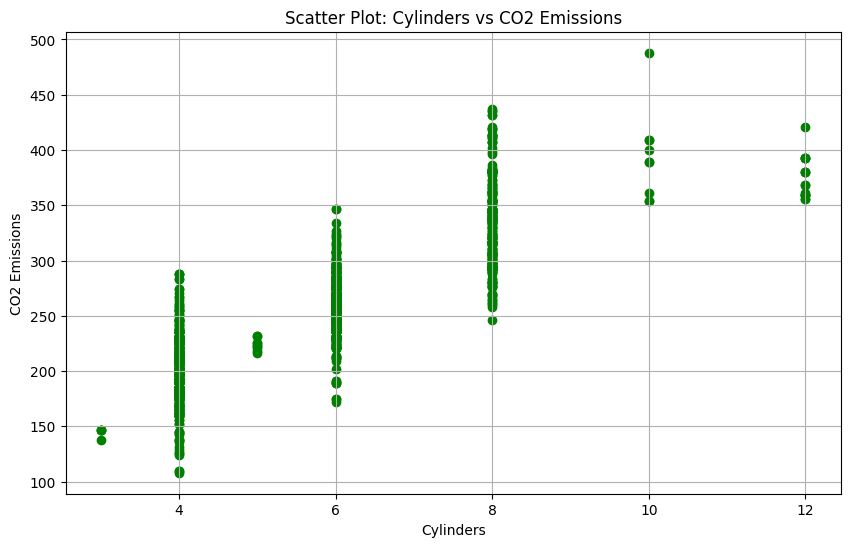

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(data['CYLINDERS'], data['CO2EMISSIONS'], color='green')
plt.title('Scatter Plot: Cylinders vs CO2 Emissions')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.grid(True)
plt.show()

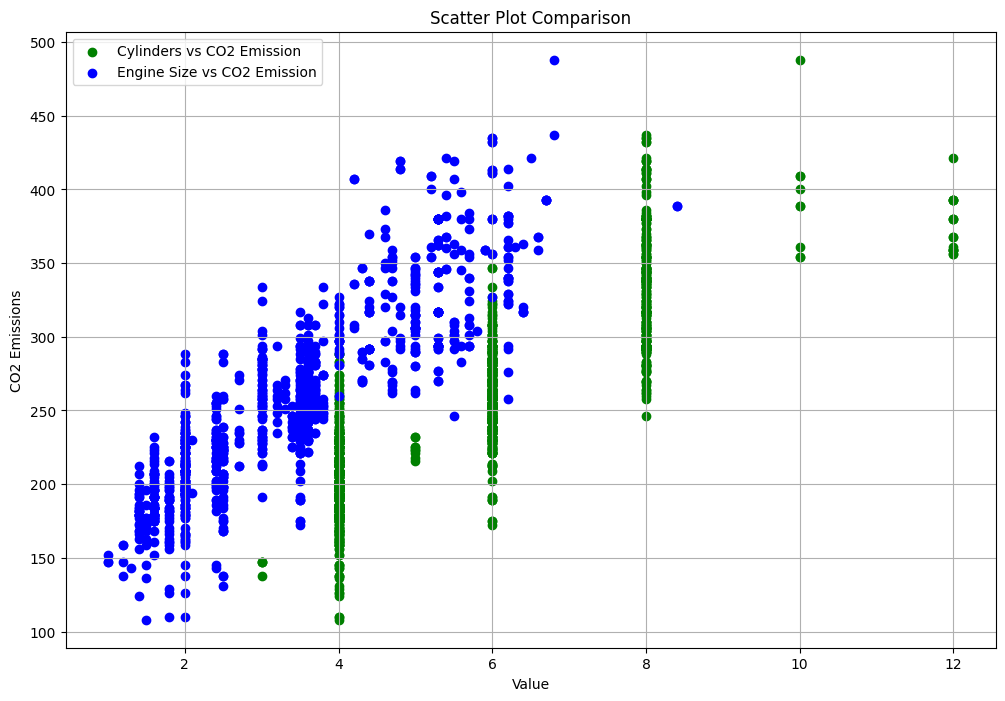

In [15]:
plt.figure(figsize=(12, 8))

plt.scatter(data['CYLINDERS'], data['CO2EMISSIONS'], color='green', label='Cylinders vs CO2 Emission')

plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], color='blue', label='Engine Size vs CO2 Emission')

plt.title('Scatter Plot Comparison')
plt.xlabel('Value')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid(True)
plt.show()


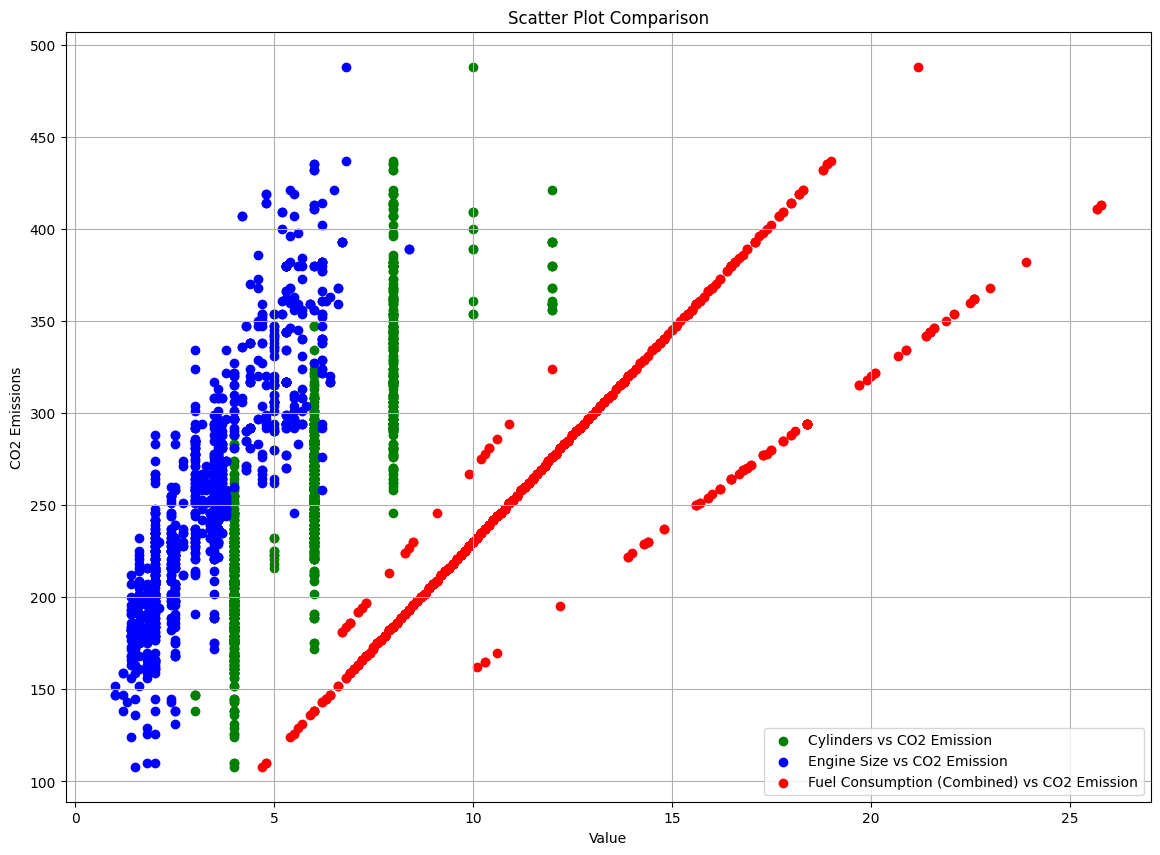

In [16]:
plt.figure(figsize=(14, 10))

plt.scatter(data['CYLINDERS'], data['CO2EMISSIONS'], color='green', label='Cylinders vs CO2 Emission')

plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], color='blue', label='Engine Size vs CO2 Emission')

plt.scatter(data['FUELCONSUMPTION_COMB'], data['CO2EMISSIONS'], color='red', label='Fuel Consumption (Combined) vs CO2 Emission')

plt.title('Scatter Plot Comparison')
plt.xlabel('Value')
plt.ylabel('CO2 Emissions')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = data[['CYLINDERS']]
y = data['CO2EMISSIONS']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model_cylinders = LinearRegression()
model_cylinders.fit(X_train, y_train)

y_pred = model_cylinders.predict(X_test)
mse_cylinders = mean_squared_error(y_test, y_pred)
print(f'MSE for Cylinders vs CO2 Emission: {mse_cylinders}')


MSE for Cylinders vs CO2 Emission: 1229.814561689401


In [18]:

X_fc = data[['FUELCONSUMPTION_COMB']]
y = data['CO2EMISSIONS']


X_train_fc, X_test_fc, y_train_fc, y_test_fc = train_test_split(X_fc, y, test_size=0.3, random_state=0)


model_fc = LinearRegression()
model_fc.fit(X_train_fc, y_train_fc)


y_pred_fc = model_fc.predict(X_test_fc)
mse_fc = mean_squared_error(y_test_fc, y_pred_fc)
print(f'MSE for Fuel Consumption (Combined) vs CO2 Emission: {mse_fc}')


MSE for Fuel Consumption (Combined) vs CO2 Emission: 844.5769247602823


In [19]:
ratios = [0.2, 0.3, 0.4]
results = []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, random_state=0)
   
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results.append((ratio, mse))
    print(f'Train-Test Ratio: {ratio}, MSE: {mse}')

print("Train-Test Ratio vs MSE:")
for ratio, mse in results:
    print(f"Ratio: {ratio}, MSE: {mse}")


Train-Test Ratio: 0.2, MSE: 1292.2744990618455
Train-Test Ratio: 0.3, MSE: 1229.814561689401
Train-Test Ratio: 0.4, MSE: 1180.8377155285957
Train-Test Ratio vs MSE:
Ratio: 0.2, MSE: 1292.2744990618455
Ratio: 0.3, MSE: 1229.814561689401
Ratio: 0.4, MSE: 1180.8377155285957
